## Battle of the Neighborhoods
### Yoga Practioners in a major US city

#### Introduction
This capstone project looks for a suitable retail location for a new startup selling yoga gear or new age products in the US. Yoga is particularly popular in big cities as the exercise is proven to bring benefits to our physical and mental health which well-off city dwellers cares very much. However, where can we find all those avid yoga practioners i.e. our potential cusomters? This naturally points to cities and areas with highest number of yoga studios!

In this project, we will make reference to fourquare API data to first identify a US city from the three largest US cities, New York, Chicago and Los Angeles, based on the number of yoga stuiods and how concentrate they are. Then, we will dive deep into the chosen city, exploring different nighborhoods and boroughs of the city in order to answer the Problem Statement -- "Which city should I start my first shop?" and "Which area in the city is the most suitable?"

### Data
To answer the first question, data from Foursquare API will be extracted through the Request library in Python and used to identify the US city with the highest number and density of yoga studious. Data on the chosen City include latitude, longitude, neighourbhoods, boroughs, details about yoga studios are needed.  All data related to locations and number of yoga stuiods for major US cities will be obtained from the FourSquare API using the Request library in Python.


### Methodology 

• FourSquare API will be used to find the US cities with the highest number and density of yoga studios

• Data will be collected from the chosen city. It will be cleaned and converted into a dataframe, before merging with the details about yoga studios extracted from FourSquare

• Number of yoga studios 

• Finally, the data be will be visually assessed using graphing from various Python libraries.



In [2]:
import numpy as np # library to handle data in a vectorized manner
import matplotlib.pyplot as plt#library for ploting
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
!conda install -c conda-forge folium=0.5.0
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

In [25]:
CLIENT_ID = 'CZENFRSOKI1R0DUXXQ2QAPDVYLCBCZN3W5YD0THJIL2XVFHV' #'NA0WYSR2BIKYBM3RQCCOO43S443WJ2N0GEGXJWDIBCRMSEMU' ## your Foursquare ID
CLIENT_SECRET ='GTF2UVMAKAUX1LULSMC3PVFX0DSLQVTN4TEWS0PBAOY0VHEO'  #'BECBBKUB0VZEX0IC3KYQ1YKHU4XP1FJVKSDVKDBBVGMU4DJ0'## your Foursquare Secret
VERSION = '20190604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CZENFRSOKI1R0DUXXQ2QAPDVYLCBCZN3W5YD0THJIL2XVFHV
CLIENT_SECRET:GTF2UVMAKAUX1LULSMC3PVFX0DSLQVTN4TEWS0PBAOY0VHEO


In [29]:
LIMIT = 100 
cities = ["New York","Los Angeles","Chicago"]
results = {}
for city in cities:
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&limit={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        city,
        LIMIT,
        "4bf58dd8d48988d102941735") # Yoga Studio CATEGORY ID
    results[city] = requests.get(url).json()

In [30]:
df_venues={}
for city in cities:
    venues = json_normalize(results[city]['response']['groups'][0]['items'])
    df_venues[city] = venues[['venue.name', 'venue.location.address', 'venue.location.lat', 'venue.location.lng']]
    df_venues[city].columns = ['Name', 'Address', 'Lat', 'Lng']

In [31]:
maps = {}
for city in cities:
    city_lat = np.mean([results[city]['response']['geocode']['geometry']['bounds']['ne']['lat'],
                        results[city]['response']['geocode']['geometry']['bounds']['sw']['lat']])
    city_lng = np.mean([results[city]['response']['geocode']['geometry']['bounds']['ne']['lng'],
                        results[city]['response']['geocode']['geometry']['bounds']['sw']['lng']])
    maps[city] = folium.Map(location=[city_lat, city_lng], zoom_start=11)

   
    for lat, lng, label in zip(df_venues[city]['Lat'], df_venues[city]['Lng'], df_venues[city]['Name']):
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.8,
            parse_html=False).add_to(maps[city])  
    print(f"Number of Yoga Studios in {city} = ", results[city]['response']['totalResults'])

Number of Yoga Studios in New York =  239
Number of Yoga Studios in Los Angeles =  212
Number of Yoga Studios in Chicago =  190


In [33]:
maps[cities[0]]

In [8]:
maps[cities[1]]

In [9]:
maps[cities[2]]

## From the maps above, it seems that yoga stuiods are sparsely distributed in LA and more densely distributed in NYC and Chicago.  Let's calculate the average distance of each shop to have a clearer picture

In [10]:

maps = {}
for city in cities:
    city_lat = np.mean([results[city]['response']['geocode']['geometry']['bounds']['ne']['lat'],
                        results[city]['response']['geocode']['geometry']['bounds']['sw']['lat']])
    city_lng = np.mean([results[city]['response']['geocode']['geometry']['bounds']['ne']['lng'],
                        results[city]['response']['geocode']['geometry']['bounds']['sw']['lng']])
    maps[city] = folium.Map(location=[city_lat, city_lng], zoom_start=11)
    venues_mean_coor = [df_venues[city]['Lat'].mean(), df_venues[city]['Lng'].mean()] 
   
    for lat, lng, label in zip(df_venues[city]['Lat'], df_venues[city]['Lng'], df_venues[city]['Name']):
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(maps[city])
        folium.PolyLine([venues_mean_coor, [lat, lng]], color="green", weight=1.5, opacity=0.5).add_to(maps[city])
    
    label = folium.Popup("Mean Co-ordinate", parse_html=True)
    folium.CircleMarker(
        venues_mean_coor,
        radius=10,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(maps[city])

    print(city)
    print("Avereage Distance from Mean coordinates")
    print(np.mean(np.apply_along_axis(lambda x: np.linalg.norm(x - venues_mean_coor),1,df_venues[city][['Lat','Lng']].values)))

New York City
Avereage Distance from Mean coordinates
0.02515387009628305
Los Angeles
Avereage Distance from Mean coordinates
0.09326151405683086
Chicago
Avereage Distance from Mean coordinates
0.042141745091127454


## Based on the findings above, we note that NYC has the highest number and density of yoga stuiods among the three major US cities.  Therefore, we recommend to open the first yoga gear or new age shop in NYC.  The next question is where in NYC? 

In [26]:
#we first define functions to be used later

def geo_location(address): # get geo location of address
    geolocator = Nominatim(user_agent="nyc_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):#set variables to fetch basic venue data from foursquare API
    radius=400
    LIMIT=500
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):#set variables to fetch other deatils of the venue from foursquare API
    
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data(): #building a dataframe with location details of different neighorbood in NYC
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [27]:
#  compile a list on the yoga studios in each NYC borough
column_names=['Borough', 'Neighborhood', 'ID','Name']
yoga_nyc=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    yoga_studio=venues[venues['Category']=='Yoga Studio']   
    #print('(',count,'/',len(ny_data),')','Yoga Studios in '+Neighborhood+', '+Borough+':'+str(len(yoga_studio)))
    #print(row)
    for yoga_detail in yoga_studio.values.tolist():
        id, name , category=yoga_detail
        yoga_nyc = yoga_nyc.append({'Borough': Borough,
                                    'Neighborhood': Neighborhood, 
                                    'ID': id,
                                    'Name' : name
                                    }, ignore_index=True)
    count+=1


## Let's try to plot it out and decide where can we find most of the studios in NYC

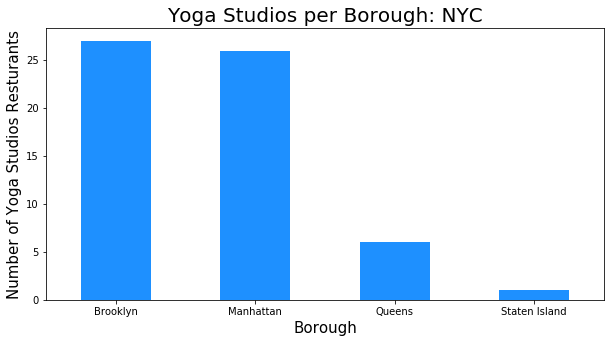

In [23]:
yoga_nyc.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = "dodgerblue")
plt.title('Yoga Studios per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Number of Yoga Studios Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

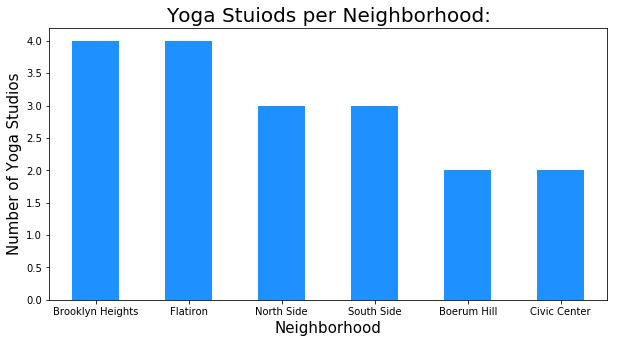

In [24]:
NOofNeigh = 6 # top number for graphing all the same past 6
yoga_nyc.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color="dodgerblue")
plt.title('Yoga Stuiods per Neighborhood:', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Number of Yoga Studios', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

## Conclusion and way-forward

Based on the findings above, we recommend to open a new yoga gear shop or new age shop in Brooklyn Heights of NYC with the highest concentration and number of potential clients  (i.e. Yogis).  Our study can be further expanded to take into account the land price and consumer behaviour of the area.  We can also take into account the figures of our competitors (i.e. other yoga gear or new age shops). 